# Purpose

Define a 2D regular grid and turn it into a 2D STL file.

In [1]:
from pathlib import Path

import numpy as np
from stl import mesh
import stl

from IPython.display import Image

# Geometry - test case

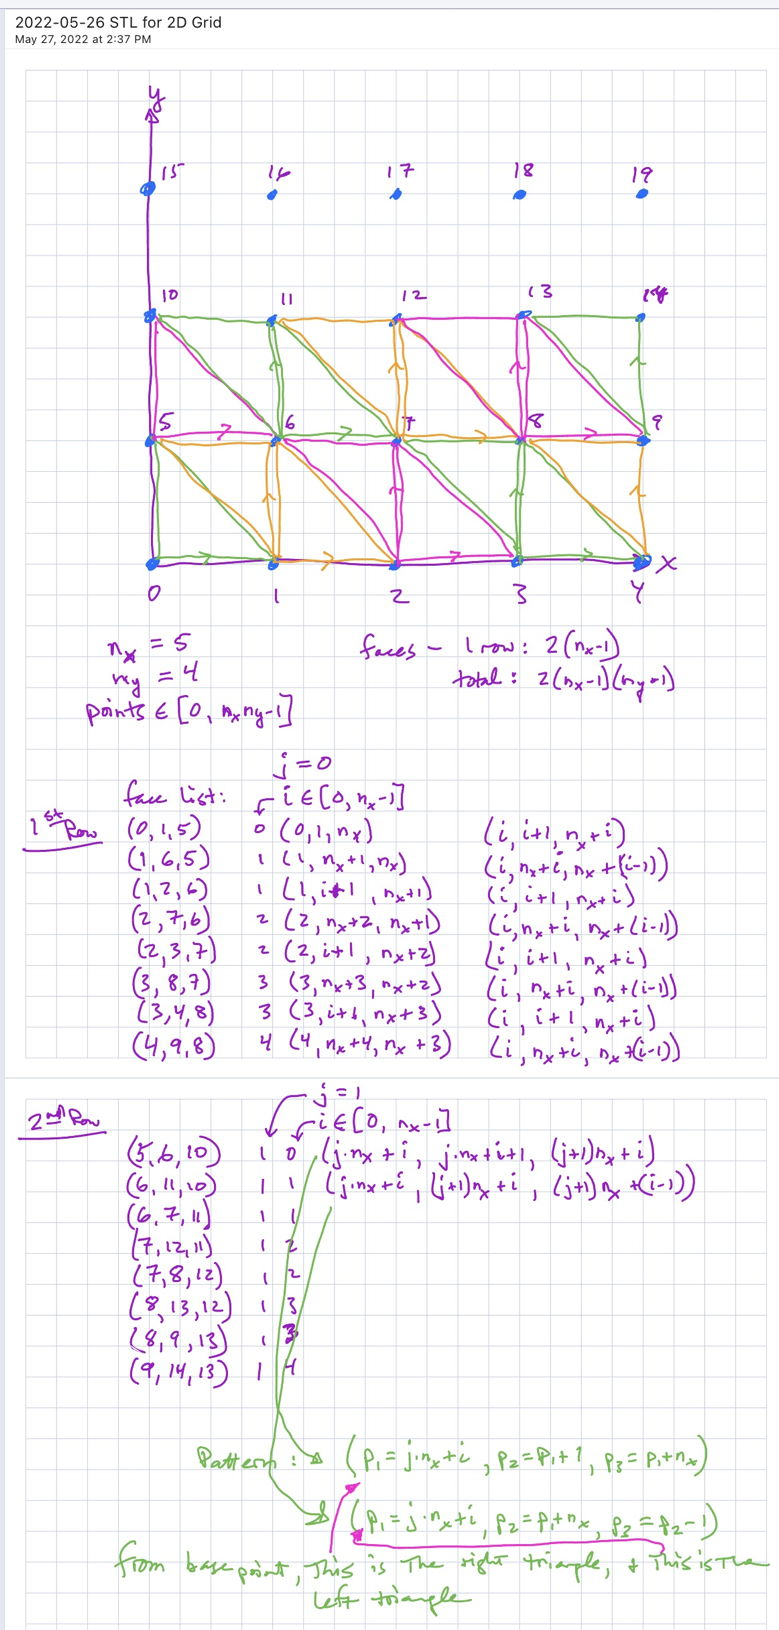

In [2]:
Image(filename="2022_05_27-STL_for_2D_Grid.jpg", width=700) 

# Set up

In [3]:
n_x = 5
n_y = 4
n_vertices = n_x * n_y
n_faces = 2 * (n_x - 1) * (n_y - 1)

print(f"(n_x, n_y): {n_x, n_y}")
print(f"{n_vertices=}")
print(f"{n_faces=}")

(n_x, n_y): (5, 4)
n_vertices=20
n_faces=24


In [4]:
dx = 0.1
dy = 0.1

print(f"x range = 0, {dx * (n_x - 1)}")
print(f"y range = 0, {dy * (n_y - 1)}")

x range = 0, 0.4
y range = 0, 0.30000000000000004


# Create vertices and faces arrays

In [5]:
vertices = np.zeros((n_vertices, 3), dtype=np.float)
# vertices

In [6]:
for j in range(n_y):
    for i in range(n_x):
        index = i + n_x * j
        print(index, i, j)
        vertices[index] = [i * dx, j * dy, 0]
vertices

0 0 0
1 1 0
2 2 0
3 3 0
4 4 0
5 0 1
6 1 1
7 2 1
8 3 1
9 4 1
10 0 2
11 1 2
12 2 2
13 3 2
14 4 2
15 0 3
16 1 3
17 2 3
18 3 3
19 4 3


array([[0. , 0. , 0. ],
       [0.1, 0. , 0. ],
       [0.2, 0. , 0. ],
       [0.3, 0. , 0. ],
       [0.4, 0. , 0. ],
       [0. , 0.1, 0. ],
       [0.1, 0.1, 0. ],
       [0.2, 0.1, 0. ],
       [0.3, 0.1, 0. ],
       [0.4, 0.1, 0. ],
       [0. , 0.2, 0. ],
       [0.1, 0.2, 0. ],
       [0.2, 0.2, 0. ],
       [0.3, 0.2, 0. ],
       [0.4, 0.2, 0. ],
       [0. , 0.3, 0. ],
       [0.1, 0.3, 0. ],
       [0.2, 0.3, 0. ],
       [0.3, 0.3, 0. ],
       [0.4, 0.3, 0. ]])

In [7]:
def triang_type_right(i, j, n_x):
    assert i < n_x - 1  # No triangle of this type for last point in row.
    point1 = j * n_x + i
    point2 = point1 + 1
    point3 = point1 + n_x
    return point1, point2, point3

def triang_type_left(i, j, n_x):
    assert i > 0  # No triangle of this type for first point in row.
    point1 = j * n_x + i
    point2 = point1 + n_x
    point3 = point2 - 1 
    return point1, point2, point3

faces = np.zeros((n_faces, 3), dtype=np.int32)

index = 0
for j in range(n_y - 1):
    for i in range(n_x):
        if i == 0:
            faces[index] = triang_type_right(i, j, n_x)
            print(i, j, index, faces[index])
            index += 1
        elif i == n_x - 1:
            faces[index] = triang_type_left(i, j, n_x)
            print(i, j, index, faces[index])
            index += 1
        else:
            faces[index] = triang_type_left(i, j, n_x)
            index += 1
            faces[index] = triang_type_right(i, j, n_x)
            index += 1

faces

0 0 0 [0 1 5]
4 0 7 [4 9 8]
0 1 8 [ 5  6 10]
4 1 15 [ 9 14 13]
0 2 16 [10 11 15]
4 2 23 [14 19 18]


array([[ 0,  1,  5],
       [ 1,  6,  5],
       [ 1,  2,  6],
       [ 2,  7,  6],
       [ 2,  3,  7],
       [ 3,  8,  7],
       [ 3,  4,  8],
       [ 4,  9,  8],
       [ 5,  6, 10],
       [ 6, 11, 10],
       [ 6,  7, 11],
       [ 7, 12, 11],
       [ 7,  8, 12],
       [ 8, 13, 12],
       [ 8,  9, 13],
       [ 9, 14, 13],
       [10, 11, 15],
       [11, 16, 15],
       [11, 12, 16],
       [12, 17, 16],
       [12, 13, 17],
       [13, 18, 17],
       [13, 14, 18],
       [14, 19, 18]], dtype=int32)

# Create mesh

In [8]:
plane_mesh = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        plane_mesh.vectors[i][j] = vertices[f[j],:]


# Save STL file

In [9]:
plane_mesh.save("2022_05_27-2D_Grid.stl", mode=stl.stl.ASCII)